# Single image preprocessing and feature extraction - Testfile

This file explores the techniques to be used for preprocessing and feature extraction for the Flavia leaves dataset images.

### Importing necessary libraries

In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Reading the image

###### Note: 'Flavia leaves dataset' should be in the project root containing Flavia images.

In [2]:
# ds_path = "Flavia leaves dataset"
ds_path = "Leaves"

In [3]:
# test_img_path = ds_path+"/1234.jpg"
#test_img_path = ds_path
test_img_path = ds_path+"/1056.jpg"
test_img_path

'Leaves/1056.jpg'

[]

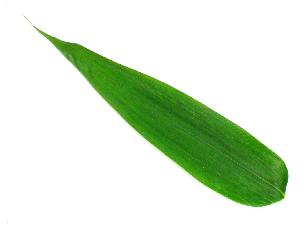

In [4]:
main_img = cv2.imread(test_img_path)
img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.plot()

### Converting image to grayscale

[]

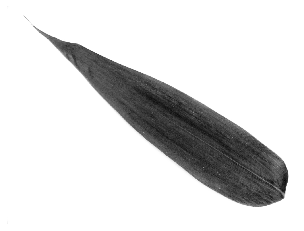

In [5]:
gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gs,cmap='Greys_r')
plt.axis('off')
plt.plot()

In [6]:
gs.shape

(1200, 1600)

### Smoothing image using Guassian filter of size (25,25)

[]

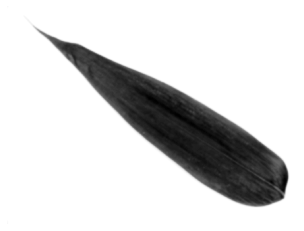

In [7]:
blur = cv2.GaussianBlur(gs, (25,25),0)
plt.imshow(blur,cmap='Greys_r')
plt.axis('off')
plt.plot()

### Adaptive image thresholding using Otsu's thresholding method

[]

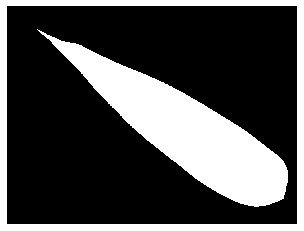

In [8]:
ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(im_bw_otsu,cmap='Greys_r')
plt.axis('off')
plt.plot()

### Closing of holes using Morphological Transformation

Performed so as to close any holes present in the leaf

In [9]:
kernel = np.ones((50,50),np.uint8)
closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

[]

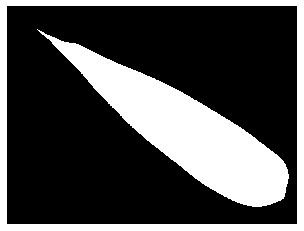

In [10]:
plt.imshow(closing,cmap='Greys_r')
plt.axis('off')
plt.plot()

# Boundary extraction

Boundary extraction is needed which will be used in calculation of shape features.

### Boundary extraction using sobel filters - Not effective

Trying to extract the boundary of the leaf using sobel filters. The image after edge extraction is thresholded using Otsu's method. Then the gaps were closed using Closing operation of Morphological Transformation.

This method is not effective as even after performing morphological transformation, gaps still persist.

[]

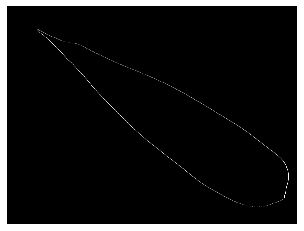

In [11]:
sobelx64f = cv2.Sobel(closing,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
plt.imshow(abs_sobel64f,cmap='Greys_r')
plt.axis('off')
plt.plot()

[]

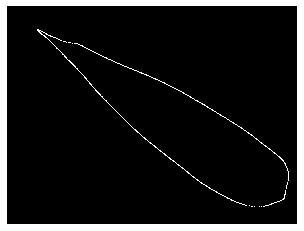

In [12]:
ret_sobel,im_bw_sobel = cv2.threshold(sobel_8u,1,255,cv2.THRESH_BINARY)
plt.imshow(im_bw_sobel,cmap='Greys_r')
plt.axis('off')
plt.plot()

[]

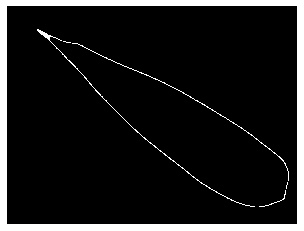

In [13]:
kernel_edge = np.ones((15,15),np.uint8)
closing_edge = cv2.morphologyEx(im_bw_sobel, cv2.MORPH_CLOSE, kernel_edge)
plt.imshow(closing_edge,cmap='Greys_r')
plt.axis('off')
plt.plot()

### Boundary extraction using contours - Effective 

Contours are used to extract leaf boundaries. They are continous, sharp and there are no gaps between the boundary pixels

[]

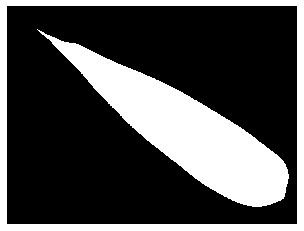

In [14]:
plt.imshow(closing,cmap="Greys_r")
plt.axis('off')
plt.plot()

In [15]:
_, contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [16]:
len(contours)

1

In [17]:
cnt = contours[0]
len(cnt)

1676

[]

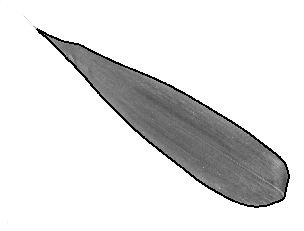

In [18]:
plottedContour = cv2.drawContours(gs,contours,-1,(0,255,0),10)
plt.imshow(plottedContour,cmap="Greys_r")
plt.axis('off')
plt.plot()

## Morphological processing

## 1. Shape based features

### Calculating moments using contours

In [19]:
M = cv2.moments(cnt)
M

{'m00': 407494.0,
 'm10': 401885055.6666666,
 'm01': 278945909.6666666,
 'm20': 437002945354.3333,
 'm11': 300288970225.0,
 'm02': 211248557491.66666,
 'm30': 507851525261173.44,
 'm21': 346041851461969.0,
 'm12': 240980520417539.25,
 'm03': 171470925179727.12,
 'mu20': 40649629800.73071,
 'mu11': 25182606856.760742,
 'mu02': 20298947142.15442,
 'mu30': -3316517681337.6875,
 'mu21': -2776071834568.574,
 'mu12': -1837309150296.875,
 'mu03': -928024466087.9688,
 'nu20': 0.24480154689439376,
 'nu11': 0.1516555290561977,
 'nu02': 0.12224499177696348,
 'nu30': -0.03128810574362341,
 'nu21': -0.026189526924772125,
 'nu12': -0.017333217700509614,
 'nu03': -0.008755004621569985}

In [20]:
area = cv2.contourArea(cnt)
area

407494.0

In [21]:
perimeter = cv2.arcLength(cnt,True)
perimeter

3690.3295385837555

### Fitting in the best-fit rectangle and ellipse

The best-fit rectangle is chosen and not ellipse as removes (leaves out) some portion at the extreme ends of the leaf image.

[]

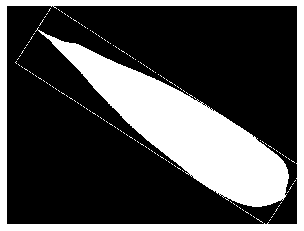

In [22]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
contours_im = cv2.drawContours(closing,[box],0,(255,255,255),2)
plt.imshow(contours_im,cmap="Greys_r")
plt.axis('off')
plt.plot()

[]

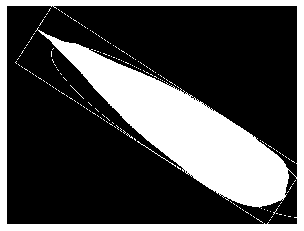

In [23]:
ellipse = cv2.fitEllipse(cnt)
im = cv2.ellipse(closing,ellipse,(255,255,255),2)
plt.imshow(closing,cmap="Greys_r")
plt.axis('off')
plt.plot()

### Shape based features calculated - Aspect ratio, rectangularity, circularity etc.

In [24]:
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h
aspect_ratio

1.420675537359263

In [25]:
rectangularity = w*h/area
rectangularity

3.327842863944009

In [26]:
circularity = ((perimeter)**2)/area
circularity

33.42020275965731

In [27]:
equi_diameter = np.sqrt(4*area/np.pi)
equi_diameter

720.3037380454931

In [28]:
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)

## 2. Color based features

### Calculating color based features - mean, std-dev of the RGB channels

[]

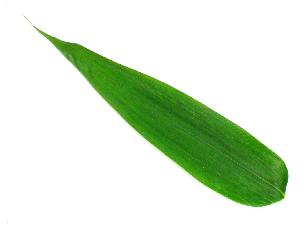

In [29]:
plt.imshow(img,cmap="Greys_r")
plt.axis('off')
plt.plot()

[]

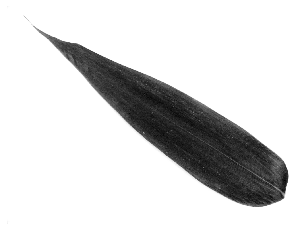

In [30]:
red_channel = img[:,:,0]
plt.imshow(red_channel,cmap="Greys_r")
plt.axis('off')
plt.plot()

[]

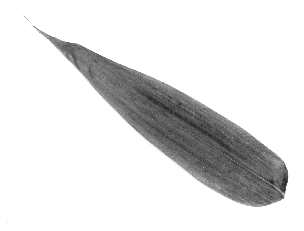

In [31]:
green_channel = img[:,:,1]
plt.imshow(green_channel,cmap="Greys_r")
plt.axis('off')
plt.plot()

[]

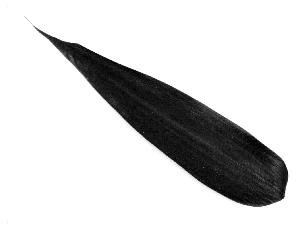

In [32]:
blue_channel = img[:,:,2]
plt.imshow(blue_channel,cmap="Greys_r")
plt.axis('off')
plt.plot()

In [33]:
np.mean(blue_channel)

205.32896041666666

In [34]:
blue_channel[blue_channel == 255] = 0
green_channel[green_channel == 255] = 0
red_channel[red_channel == 255] = 0

In [35]:
red_mean = np.mean(red_channel)
red_mean

15.051540104166667

In [36]:
green_mean = np.mean(green_channel)
green_mean

30.998955729166667

In [37]:
blue_mean = np.mean(blue_channel)
blue_mean

8.839905729166667

In [38]:
red_var = np.std(red_channel)
red_var

34.51293840076737

## 3. Texture based features 

### Using Haralick moments - calculating texture based features such as contrast, correlation, entropy

In [39]:

import mahotas as mt

In [40]:
textures = mt.features.haralick(gs)
ht_mean = textures.mean(axis=0)
ht_mean

array([ 5.91112470e-01,  1.12020942e+02,  9.88992203e-01,  5.08806532e+03,
        8.43161360e-01,  4.34994729e+02,  2.02402403e+04,  2.30988803e+00,
        2.98477930e+00,  2.57003090e-03,  1.33921680e+00, -5.64202990e-01,
        9.50711267e-01])

In [41]:
print(ht_mean[1]) #contrast
print(ht_mean[2]) #correlation
print(ht_mean[4]) #inverse difference moments
print(ht_mean[8]) #entropy

112.02094234707262
0.9889922029197067
0.8431613602186129
2.9847792967614515
